## Hyphothesis 4/5: 
### The alternaive portfolio will have a return >0.0 and will outperform the Control Portfolios (30 random stocks sected from 2 pools) in 2019 and 2020

## Criteria for Alternative Portfolio:
### Return during 9/2008-12/2008 > MKT return during the same time

In [107]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

### import prices and return data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [141]:
from random import shuffle
import random
import seaborn as sns

In [3]:
os.chdir('C:\\Users\\A Sua\\Documents\\FIU\\CAP2020')

In [23]:
df_price = pd.read_csv('data\\processed\\df_price07_20.csv')
df_return = pd.read_csv('data\\processed\\df_return7_20.csv')

df_price.rename(columns={'Unnamed: 0': 'date'}, inplace=True)
df_return.rename(columns={'Unnamed: 0': 'date'}, inplace=True)

df_price.index = pd.to_datetime(df_price['date'])
df_return.index = pd.to_datetime(df_return['date'])

df_price = df_price.drop('date', axis=1)
df_return = df_return.drop('date', axis=1)

In [33]:
dfsp = pd.read_csv('data\\external\\SP500_07_20.csv')
dfsp.index = pd.to_datetime(dfsp['date'])
dfsp = dfsp.drop('date', axis=1)
dfsp.head(1)

,Open,High,Low,Close,Volume,Return
date,,,,,,
2020-03-24,2344.4399,2400.6001,2344.4399,2398.0901,1.597733e+09,0.022884


In [28]:
df_price.head(1)

,A,AAL,AAP,AAPL,ABC,ABMD,ABT,ACN,ADBE,ADI,...,WYNN,XEC,XEL,XLNX,XOM,XRAY,XRX,YUM,ZBH,ZION
date,,,,,,,,,,,,,,,,,,,,,
2020-03-20,66.46,10.38,75.03,229.24,80.61,130.51,68.0,149.94,295.34,85.08,...,51.97,14.8,50.63,71.86,32.74,32.82,16.45,58.08,85.98,25.58


In [29]:
df_return.head(1)

,A,AAL,AAP,AAPL,ABC,ABMD,ABT,ACN,ADBE,ADI,...,WYNN,XEC,XEL,XLNX,XOM,XRAY,XRX,YUM,ZBH,ZION
date,,,,,,,,,,,,,,,,,,,,,
2020-03-20,0.007122,-0.02559,-0.132501,-0.072579,-0.071741,-0.081756,-0.081702,-0.048181,-0.05618,-0.072015,...,0.053346,-0.122703,-0.141864,-0.070375,-0.060276,-0.073405,-0.079978,-0.093067,-0.050679,-0.0654


#### RETURNS: 8/2008-12/2008: S&P

In [47]:
return_sp08 = ((dfsp.loc['2008-12-31', 'Close'].values-dfsp.loc['2008-09-02', 'Open'].values)/dfsp.loc['2008-09-02', 'Open'].values)[0]
return_sp08

-0.2986263714931318

#### RETURNS: 2019: S&P

In [48]:
return_sp19 = ((dfsp.loc['2019-12-31', 'Close'].values-dfsp.loc['2019-01-02', 'Open'].values)/dfsp.loc['2019-01-02', 'Open'].values)[0]
return_sp19

0.30433273044376985

#### RETURNS: 2020: S&P

In [52]:
return_sp20 = ((dfsp.loc['2020-03-20', 'Close'].values-dfsp.loc['2020-01-02', 'Open'].values)/dfsp.loc['2020-01-02', 'Open'].values)[0]
return_sp20

-0.2896288463735556

### Company Symbols

In [55]:
companies = df_price.columns

### RETURNS: 8/2008-12/2008: PER COMPANY

In [59]:
worst_days_returns08 = {}
for symbol in companies:
    temp_end = df_price.loc['2008-12-31', symbol].values
    temp_start = df_price.loc['2008-08-29', symbol].values
    temp_ret = ((temp_end-temp_start)/temp_start)[0]
    worst_days_returns08[symbol] = temp_ret
worst_days_returns08['ORCL']

-0.19151846785225715

### Risk Free Rates

## Alt Portfolio Construction

### Check the symbol space sizes of Pick Alt, Control 1 spaces
### Set Decision Boundary based off of returns beating the S&P by 0.01, 0.02, 0.03, .... at the end of 2008

In [308]:
t_values = np.arange(0, 0.31, 0.01) 
for value in t_values:
    alt_list = []
    control_list1 = []
    for symbol in companies:
        temp_series = worst_days_returns08[symbol]
        if temp_series-return_sp08>value:
            alt_list.append(symbol)
        else:
            control_list1.append(symbol)
    print('R:{}, Alt pool size: {}, Ctl1 pool size {}'.format(value, len(alt_list), len(control_list1)))

R:0.0, Alt pool size: 191, Ctl1 pool size 224
R:0.01, Alt pool size: 182, Ctl1 pool size 233
R:0.02, Alt pool size: 173, Ctl1 pool size 242
R:0.03, Alt pool size: 168, Ctl1 pool size 247
R:0.04, Alt pool size: 159, Ctl1 pool size 256
R:0.05, Alt pool size: 155, Ctl1 pool size 260
R:0.06, Alt pool size: 148, Ctl1 pool size 267
R:0.07, Alt pool size: 144, Ctl1 pool size 271
R:0.08, Alt pool size: 138, Ctl1 pool size 277
R:0.09, Alt pool size: 129, Ctl1 pool size 286
R:0.1, Alt pool size: 120, Ctl1 pool size 295
R:0.11, Alt pool size: 111, Ctl1 pool size 304
R:0.12, Alt pool size: 105, Ctl1 pool size 310
R:0.13, Alt pool size: 104, Ctl1 pool size 311
R:0.14, Alt pool size: 101, Ctl1 pool size 314
R:0.15, Alt pool size: 94, Ctl1 pool size 321
R:0.16, Alt pool size: 81, Ctl1 pool size 334
R:0.17, Alt pool size: 77, Ctl1 pool size 338
R:0.18, Alt pool size: 69, Ctl1 pool size 346
R:0.19, Alt pool size: 64, Ctl1 pool size 351
R:0.2, Alt pool size: 57, Ctl1 pool size 358
R:0.21, Alt pool size:

### Alternative Portfolio, weigthted by optimal sharpe ratio

### Lets pick the Threshold = 0, 

In [131]:
value=0.10
alt_list = []
control_list1 = []
for symbol in companies:
    temp_series = worst_days_returns08[symbol]
    if temp_series-return_sp08>value:
        alt_list.append(symbol)
    else:
        control_list1.append(symbol)
print('Alt pool size: {}, Ctl1 pool size {}'.format(len(alt_list), len(control_list1)))

Alt pool size: 120, Ctl1 pool size 295


In [132]:
alt_symbols = random.sample(alt_list, 30)
control_symbols1 = random.sample(control_list1, 30)
control_symbols2 = random.sample(list(companies), 30)

# NAIVE METHOD

### Generate Returns for Alt, Ctl1, Ctl2

In [133]:
alt_close18 = df_price.loc[:, alt_symbols].loc['2018-12-31', :]
alt_close19 = df_price.loc[:, alt_symbols].loc['2019-12-31', :]
alt_close20 = df_price.loc[:, alt_symbols].loc['2020-03-20', :]

alt_return19 = (alt_close19.sum().sum()-alt_close18.sum().sum())/alt_close18.sum().sum()
alt_return20 = (alt_close20.sum().sum()-alt_close19.sum().sum())/alt_close19.sum().sum()
alt_return19, alt_return20

(0.26440592815875374, -0.3069960342687613)

In [134]:
ctl1_close18 = df_price.loc[:, control_symbols1].loc['2018-12-31', :]
ctl1_close19 = df_price.loc[:, control_symbols1].loc['2019-12-31', :]
ctl1_close20 = df_price.loc[:, control_symbols1].loc['2020-03-20', :]

ctl1_return19 = (ctl1_close19.sum().sum()-ctl1_close18.sum().sum())/ctl1_close18.sum().sum()
ctl1_return20 = (ctl1_close20.sum().sum()-ctl1_close19.sum().sum())/ctl1_close19.sum().sum()

ctl1_return19, ctl1_return20

(0.32111082043558914, -0.24457404031069704)

In [135]:
ctl2_close18 = df_price.loc[:, control_symbols2].loc['2018-12-31', :]
ctl2_close19 = df_price.loc[:, control_symbols2].loc['2019-12-31', :]
ctl2_close20 = df_price.loc[:, control_symbols2].loc['2020-03-20', :]

ctl2_return19 = (ctl2_close19.sum().sum()-ctl2_close18.sum().sum())/ctl2_close18.sum().sum()
ctl2_return20 = (ctl2_close20.sum().sum()-ctl2_close19.sum().sum())/ctl2_close19.sum().sum()

ctl2_return19, ctl2_return20

(0.15705418336997276, -0.2621881610984712)

In [167]:
sp_scatter_data19 = zip(r_thresholds, [return_sp19 for i in range(len(r_thresholds))])#, [return_sp20 for i in range(len(r_thresholds))])
sp_scatter_data20 = zip(r_thresholds, [return_sp20 for i in range(len(r_thresholds))])

sp_df19 = pd.DataFrame(sp_scatter_data19, columns=['r_value', 'returns19'])
sp_df20 = pd.DataFrame(sp_scatter_data20, columns=['r_value', 'returns20'])

In [277]:
from time import time

In [279]:
time()

1585192592.6424618

### Note: one the the return threshold grows above 20% (at least for sp500 stocks) we dont get a lot of seperablity with small portfolios (10,15 in size) 

In [336]:
#r_thresholds = [0, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.18, 0.2, 0.22] ## threshold value compared to market
#r_thresholds = [0, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.18] ## threshold value compared to market
#portfolio_size = [10, 20, 50] ## number of stocks in each portfolio
#n_samples = [20, 30, 40, 100, 500, 1000] ### number of bootstraps of sample_size=portfolio size 



r_thresholds = [0, 0.05, 0.1, 0.15, 0.20] ## threshold value compared to market
portfolio_size = [15, 20, 25] ## number of stocks in each portfolio
#n_samples = [10000, 50000] ### number of bootstraps of sample_size=portfolio size 
#n_samples = [2000, 5000] ### number of bootstraps of sample_size=portfolio size 
n_samples = [5000]


experiment_df = pd.DataFrame([])

#pd.DataFrame(comparison_dic, index=['sample1'])

t0 = time()
for value in r_thresholds:
    """generate/sample symbols"""
    for size in portfolio_size:
        for sample_size in n_samples:
            n_bootstraps = sample_size
            for i in range(n_bootstraps):
                comparison_dic = {}
                #symbols_dic = {}
                
                alt_list = []
                control_list1 = []
                        
                for symbol in companies:
                    temp_series = worst_days_returns08[symbol]
                    if temp_series-return_sp08>value:
                        alt_list.append(symbol)
                    else:
                        control_list1.append(symbol)
                #print('Alt pool size: {}, Ctl1 pool size {}'.format(len(alt_list), len(control_list1)))

                #print(len(alt_list),len(control_list))

#                 alt_symbols = random.sample(alt_list, size)
#                 control_symbols = random.sample(control_list, size)                
                alt_symbols = random.sample(alt_list, size)
                control_symbols1 = random.sample(control_list1, size)
                control_symbols2 = random.sample(list(companies), size)
                
                ### Add the 
                comparison_dic['alt_symbols'] = [alt_symbols]
                comparison_dic['control_symbols1'] = [control_symbols1]
                comparison_dic['control_symbols2'] = [control_symbols2]
                

                ### Generage Beginning/End Prices of the portfolios
                alt_close18 = df_price.loc[:, alt_symbols].loc['2018-12-31', :]
                alt_close19 = df_price.loc[:, alt_symbols].loc['2019-12-31', :]
                alt_close20 = df_price.loc[:, alt_symbols].loc['2020-03-20', :]
                                
                ctl1_close18 = df_price.loc[:, control_symbols1].loc['2018-12-31', :]
                ctl1_close19 = df_price.loc[:, control_symbols1].loc['2019-12-31', :]
                ctl1_close20 = df_price.loc[:, control_symbols1].loc['2020-03-20', :]
                               
                ctl2_close18 = df_price.loc[:, control_symbols2].loc['2018-12-31', :]
                ctl2_close19 = df_price.loc[:, control_symbols2].loc['2019-12-31', :]
                ctl2_close20 = df_price.loc[:, control_symbols2].loc['2020-03-20', :]
                
                ### generate returns
                alt_return19 = (alt_close19.sum().sum()-alt_close18.sum().sum())/alt_close18.sum().sum()
                alt_return20 = (alt_close20.sum().sum()-alt_close19.sum().sum())/alt_close19.sum().sum()
                ctl1_return19 = (ctl1_close19.sum().sum()-ctl1_close18.sum().sum())/ctl1_close18.sum().sum()
                ctl1_return20 = (ctl1_close20.sum().sum()-ctl1_close19.sum().sum())/ctl1_close19.sum().sum()
                ctl2_return19 = (ctl2_close19.sum().sum()-ctl2_close18.sum().sum())/ctl2_close18.sum().sum()
                ctl2_return20 = (ctl2_close20.sum().sum()-ctl2_close19.sum().sum())/ctl2_close19.sum().sum()                

                #### Add values to comparison dictionary
                comparison_dic['control1_19'] = ctl1_return19,
                comparison_dic['control1_20'] = ctl1_return20,
                comparison_dic['control2_19'] = ctl2_return19,
                comparison_dic['control2_20'] = ctl2_return20,
                

                comparison_dic['alternate19'] = alt_return19
                comparison_dic['alternate20'] = alt_return20                
                
                comparison_dic['r_value'] = value
                comparison_dic['sample_size'] = n_bootstraps
                comparison_dic['portfolio_size'] = size
                ### Add to the dataframe
                temp_df = pd.DataFrame(comparison_dic)
                experiment_df = pd.concat([experiment_df, temp_df])
        print('{} complete'.format((value, size)))
        t1 = round((time()-t0)/60, 4)
        print('{} minutes have passed'.format(t1))

        
### CAPTURE THE VARIANCE OF THE RETURNS FOR EACH OF THE SYMBOLS        
        
experiment_df

(0, 15) complete
2.4105 minutes have passed
(0, 20) complete
4.8986 minutes have passed
(0, 25) complete
7.121 minutes have passed
(0.05, 15) complete
9.329 minutes have passed
(0.05, 20) complete
11.6773 minutes have passed
(0.05, 25) complete
14.1069 minutes have passed
(0.1, 15) complete
16.5507 minutes have passed
(0.1, 20) complete
19.0815 minutes have passed
(0.1, 25) complete
21.706 minutes have passed
(0.15, 15) complete
24.3372 minutes have passed
(0.15, 20) complete
27.0624 minutes have passed
(0.15, 25) complete
29.8917 minutes have passed
(0.2, 15) complete
32.7215 minutes have passed
(0.2, 20) complete
35.7268 minutes have passed
(0.2, 25) complete
38.8178 minutes have passed


,alt_symbols,control_symbols1,control_symbols2,control1_19,control1_20,control2_19,control2_20,alternate19,alternate20,r_value,sample_size,portfolio_size
0,"[CNP, REG, GL, BIIB, ADM, ORCL, ED, SO, JNJ, A...","[LEG, PFG, AMAT, CAH, ALGN, NI, BA, AMG, MCO, ...","[NKTR, AZO, MTB, LRCX, O, IPGP, TIF, STX, BXP,...",0.263736,-0.410700,0.387267,-0.344114,0.141111,-0.251224,0.0,5000,15
0,"[CL, MLM, MMC, HRL, AMGN, KR, TFX, KSS, ZION, ...","[NVDA, FFIV, SLG, MOS, ZBH, PFG, PWR, NTRS, AV...","[AMAT, AZO, STX, PRGO, GILD, HES, BAC, AAL, UA...",0.278904,-0.254089,0.295237,-0.331153,0.308145,-0.289329,0.0,5000,15
0,"[PGR, ALL, MYL, UNM, DGX, ORCL, USB, LLY, CNP,...","[IT, AXP, L, DOV, PKG, VAR, GPS, IVZ, BAC, NTR...","[PPG, SCHW, LH, KSU, MKC, STZ, JPM, WMB, PRU, ...",0.266101,-0.375843,0.290103,-0.340108,0.241854,-0.299823,0.0,5000,15
0,"[CPB, CVX, AFL, HPQ, NKE, CNC, ABMD, ES, ABC, ...","[XLNX, INTC, DOV, HST, MET, L, COP, ROK, APA, ...","[CTXS, A, AAPL, FLS, JPM, AXP, BAX, IVZ, KMB, ...",0.238231,-0.405210,0.274226,-0.263893,-0.019827,-0.216844,0.0,5000,15
0,"[MKC, VZ, EMR, EFX, KSS, AFL, NKE, UNM, CHRW, ...","[DHI, CMI, CPRT, CRM, MCHP, EA, VLO, GRMN, APH...","[AAL, CSCO, AME, BBY, YUM, INTC, K, LB, HRL, F...",0.282680,-0.371877,0.193095,-0.326767,0.145570,-0.285218,0.0,5000,15
...,...,...,...,...,...,...,...,...,...,...,...,...
0,"[O, MCD, EXPD, GILD, MNST, PFE, GIS, DRI, ED, ...","[FCX, BAX, EXR, HAL, JNPR, CF, TSN, PHM, AMT, ...","[CVS, RJF, AON, DTE, DVA, ROK, TMO, WAT, PEP, ...",0.332077,-0.279840,0.253514,-0.309434,0.141773,-0.247362,0.2,5000,25
0,"[RE, ABMD, KR, ADM, SHW, XOM, HBAN, NFLX, EW, ...","[PLD, TSCO, BLK, TSN, CVX, LLY, LKQ, LH, OKE, ...","[L, PKG, TROW, WM, MRO, CF, AEE, DHR, VRSN, SR...",0.257757,-0.283727,0.243586,-0.277225,0.179377,-0.248699,0.2,5000,25
0,"[ROL, PFE, LDOS, GILD, BIIB, PRGO, VRTX, NKTR,...","[WHR, CTL, PPL, MRO, KO, SPG, ESS, ROP, SYY, D...","[STX, FDX, NSC, MAS, BLK, NVDA, ETN, TAP, FAST...",0.235794,-0.272373,0.135906,-0.312578,0.198356,-0.164729,0.2,5000,25
0,"[PRGO, DLTR, LDOS, XEL, MNST, WM, VRTX, ABT, N...","[EMR, F, SRE, LKQ, FAST, AMG, LNT, XRX, BEN, G...","[ARE, STX, BKNG, ABMD, DOV, SIVB, BBY, HSIC, P...",0.216573,-0.353558,0.248419,-0.346578,0.253464,-0.282690,0.2,5000,25


In [337]:
comparison_df = experiment_df.iloc[:, 3:]
comparison_df.head(2)

,control1_19,control1_20,control2_19,control2_20,alternate19,alternate20,r_value,sample_size,portfolio_size
0,0.263736,-0.410700,0.387267,-0.344114,0.141111,-0.251224,0.0,5000,15
0,0.278904,-0.254089,0.295237,-0.331153,0.308145,-0.289329,0.0,5000,15


In [346]:
### max date_max sample size
experiment_df.to_csv('data\\external\\naive_experiment_320_5000.csv')

In [ ]:
# sns.catplot(data=melted_df, kind='box', x='r_value', y='returns', hue='portfolio') 

## GRID OF SUBPLOTS OF CATEGORY BOXPLOTS

In [ ]:
# subplot_size = len(portfolio_size)*len(n_samples)


# fig, ax = plt.subplots(len(n_samples), len(portfolio_size), figsize=(25,20))
# idx_matrix = np.array(range(subplot_size)).reshape(len(n_samples),len(portfolio_size))

# for i in range(len(n_samples)):
#     for j in range(len(portfolio_size)):
        
#         sample_size = n_samples[i]
#         p_size = portfolio_size[j]
#         temp_axis = ax[i,j]
        
#         temp_df = comparison_df[(comparison_df['sample_size']==sample_size) & (comparison_df['portfolio_size']==p_size)]
#         melted_df = pd.melt(temp_df,id_vars=['r_value', 'sample_size', 'portfolio_size'], value_vars=['control1_19', 'control1_20', 'control2_19', 'control2_20', 'alternate19', 'alternate20'],
#                     var_name = 'portfolio', value_name='returns')

#         g = sns.catplot(ax=temp_axis, data=melted_df, kind='box', x='r_value', y='returns', hue='portfolio', legend=True, legend_out=False)
#                    #inner='quartile', #inner='stick', 
#                     #split=False, 
#                     #alpha=0.5)
#                     #cut=0)
# #         sns.scatterplot(ax=temp_axis, data = sp_df19, x='r_value', y='returns19')#, hue='portfolio')
# #         sns.scatterplot(ax=temp_axis, data = sp_df20, x='r_value', y='returns20')#, hue='portfolio')
#         g.despine(left=True)
#         g._legend.
#         #g.ax.legend(loc=10)

#         temp_axis.spines['top'].set_visible(False)
#         temp_axis.spines['right'].set_visible(False)
#         temp_axis.set_xlabel('')
#         temp_axis.set_ylabel('')        
            
#         temp_axis.set_title('Samples={}, P_Size={}'.format(sample_size, p_size))
#         temp_axis.tick_params(axis="x", rotation=20)
#         temp_axis.axhline(return_sp19, color='red', alpha=0.7)
#         temp_axis.axhline(return_sp20, color='red', alpha=0.7)
#         temp_axis.set_ylim(-0.6, 0.65)
        
#         temp_axis.legend(loc='best')
#         #sns.plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


# fig.suptitle('Alternative vs. Control Portfolios 2019, 2020', fontsize=25)
# fig.text(0.5, 0.04, 'R Threshold', ha='center', va='center', fontsize=15)
# fig.text(0.06, 0.5, 'Return', ha='center', va='center', rotation='vertical', fontsize=15)
# fig.subplots_adjust(hspace=0.5)

# #plt.tight_layout()
# plt.close()
# plt.show()

### Dont get discouraged, this still looks good... just select one of the combos that looks good

### Try again with single value 

In [ ]:
r_thresholds, portfolio_size, n_samples

In [540]:
def plot_boxplots_naive(sample_size, portfolio_size, dataframe):
    fig, ax = plt.subplots(figsize=(15,12))

    sample_size = sample_size
    p_size = portfolio_size


    temp_df = dataframe[(dataframe['sample_size']==sample_size) & (dataframe['portfolio_size']==p_size)]
    melted_df = pd.melt(temp_df,id_vars=['r_value', 'sample_size', 'portfolio_size'], value_vars=['control1_19', 'control1_20', 'control2_19', 'control2_20', 'alternate19', 'alternate20'],
                var_name = 'portfolio', value_name='returns')

    g = sns.catplot(ax=ax, data=melted_df, kind='box', x='r_value', y='returns', hue='portfolio', legend=True, legend_out=True)


    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel('')
    ax.set_ylabel('')        

    ax.set_title('Samples={}, P_Size={}'.format(sample_size, p_size), fontsize=20)
    ax.tick_params(axis="x", rotation=20)
    ax.axhline(return_sp19, color='red', alpha=0.7, label='SP500 2019/2020')
    ax.axhline(return_sp20, color='red', alpha=0.7)
    ax.axhline(0, color='black', alpha=0.85, linewidth=3)
    ax.set_ylim(-0.05, 0.05)

    legend = ax.legend(loc='upper right', bbox_to_anchor=(1.15,1), title='Portfolio', fontsize=12)
    legend.get_title().set_fontsize('15')


    fig.suptitle('Alternative vs. Control Portfolios 2019, 2020', fontsize=25)
    fig.text(0.5, 0.04, 'R Threshold', ha='center', va='center', fontsize=15)
    fig.text(0.06, 0.5, 'Portfolio Return', ha='center', va='center', rotation=90, fontsize=15)
    fig.subplots_adjust(hspace=0.5)

    #plt.tight_layout()
    plt.close()
    plt.show()

In [338]:
r_thresholds, portfolio_size, n_samples

([0, 0.05, 0.1, 0.15, 0.2], [15, 20, 25], [5000])

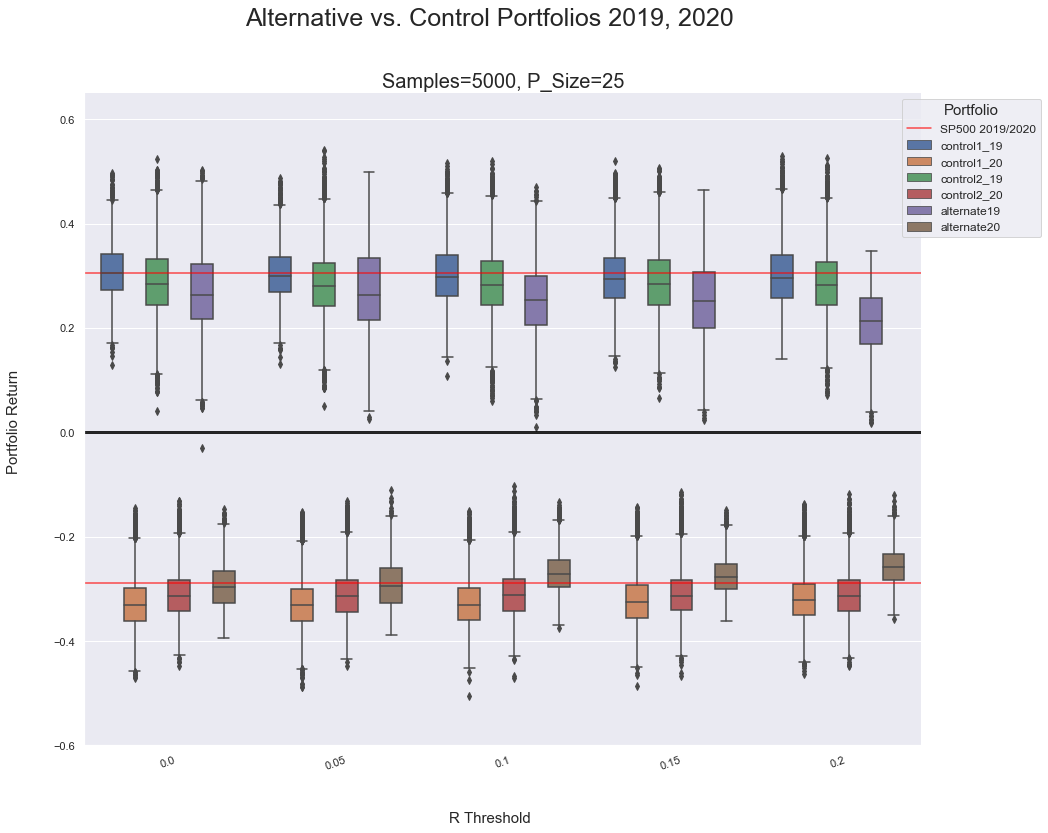

In [535]:
plot_boxplots_naive(sample_size=5000, portfolio_size=25, dataframe=comparison_df)

### RUN THE T-TEST ON 2019 RESULTS

### RUN THE T-TEST ON 2020 RESULTS

### Chi Square Test on the Sigmas?

# SHARPE RATIO METHOD

### Sample Alternative, Ctl1, Ctl2 Symbols

In [478]:
size=25
alt_list = []
control_list1 = []

for symbol in companies:
    temp_series = worst_days_returns08[symbol]
    if temp_series-return_sp08>0.1:
        alt_list.append(symbol)
    else:
        control_list1.append(symbol)
#print('Alt pool size: {}, Ctl1 pool size {}'.format(len(alt_list), len(control_list1)))

#print(len(alt_list),len(control_list))

#                 alt_symbols = random.sample(alt_list, size)
#                 control_symbols = random.sample(control_list, size)                
alt_symbols = random.sample(alt_list, size)
ctl1_symbols = random.sample(control_list1, size)
ctl2_symbols = random.sample(list(companies), size)

In [479]:
df_price.shape

(3328, 415)

### Generate Dates for Monthly Returns

In [360]:
start_dates = pd.to_datetime([ 
# '12/29/2006',
# '01/31/2007','02/28/2007','03/30/2007','04/30/2007','05/31/2007','06/29/2007','07/31/2007','08/31/2007','09/28/2007','10/31/2007','11/30/2007','12/31/2007',
# '01/31/2008','02/29/2008','03/31/2008','04/30/2008','05/30/2008','06/30/2008','07/31/2008','08/29/2008','09/30/2008','10/31/2008','11/28/2008',
'12/31/2008',
'01/30/2009','02/27/2009','03/31/2009','04/30/2009','05/29/2009','06/30/2009','07/31/2009','08/31/2009','09/30/2009','10/30/2009','11/30/2009','12/31/2009',
'01/29/2010','02/26/2010','03/31/2010','04/30/2010','05/28/2010','06/30/2010','07/30/2010','08/31/2010','09/30/2010','10/29/2010','11/30/2010','12/31/2010',
'01/31/2011','02/28/2011','03/31/2011','04/29/2011','05/31/2011','06/30/2011','07/29/2011','08/31/2011','09/30/2011','10/31/2011','11/30/2011','12/30/2011',
'01/31/2012','02/29/2012','03/30/2012','04/30/2012','05/31/2012','06/29/2012','07/31/2012','08/31/2012','09/28/2012','10/31/2012','11/30/2012','12/31/2012',
'01/31/2013','02/28/2013','03/28/2013','04/30/2013','05/31/2013','06/28/2013','07/31/2013','08/30/2013','09/30/2013','10/31/2013','11/29/2013','12/31/2013',
'01/31/2014','02/28/2014','03/31/2014','04/30/2014','05/30/2014','06/30/2014','07/31/2014','08/29/2014','09/30/2014','10/31/2014','11/28/2014','12/31/2014',
'01/30/2015','02/27/2015','03/31/2015','04/30/2015','05/29/2015','06/30/2015','07/31/2015','08/31/2015','09/30/2015','10/30/2015','11/30/2015','12/31/2015',
'01/29/2016','02/29/2016','03/31/2016','04/29/2016','05/31/2016','06/30/2016','07/29/2016','08/31/2016','09/30/2016','10/31/2016','11/30/2016','12/30/2016',
'01/31/2017','02/28/2017','03/31/2017','04/28/2017','05/31/2017','06/30/2017','07/31/2017','08/31/2017','09/29/2017','10/31/2017','11/30/2017','12/29/2017',
'01/31/2018','02/28/2018','03/29/2018','04/30/2018','05/31/2018','06/29/2018','07/31/2018','08/31/2018','09/28/2018','10/31/2018','11/30/2018','12/31/2018',
'01/31/2019','02/28/2019','03/29/2019','04/30/2019','05/31/2019','06/28/2019','07/31/2019','08/30/2019','09/30/2019','10/31/2019','11/29/2019'
])

end_dates = pd.to_datetime([ 
# '01/31/2007','02/28/2007','03/30/2007','04/30/2007','05/31/2007','06/29/2007','07/31/2007','08/31/2007','09/28/2007','10/31/2007','11/30/2007','12/31/2007',
# '01/31/2008','02/29/2008','03/31/2008','04/30/2008','05/30/2008','06/30/2008','07/31/2008','08/29/2008','09/30/2008','10/31/2008','11/28/2008','12/31/2008',
'01/30/2009','02/27/2009','03/31/2009','04/30/2009','05/29/2009','06/30/2009','07/31/2009','08/31/2009','09/30/2009','10/30/2009','11/30/2009','12/31/2009',
'01/29/2010','02/26/2010','03/31/2010','04/30/2010','05/28/2010','06/30/2010','07/30/2010','08/31/2010','09/30/2010','10/29/2010','11/30/2010','12/31/2010',
'01/31/2011','02/28/2011','03/31/2011','04/29/2011','05/31/2011','06/30/2011','07/29/2011','08/31/2011','09/30/2011','10/31/2011','11/30/2011','12/30/2011',
'01/31/2012','02/29/2012','03/30/2012','04/30/2012','05/31/2012','06/29/2012','07/31/2012','08/31/2012','09/28/2012','10/31/2012','11/30/2012','12/31/2012',
'01/31/2013','02/28/2013','03/28/2013','04/30/2013','05/31/2013','06/28/2013','07/31/2013','08/30/2013','09/30/2013','10/31/2013','11/29/2013','12/31/2013',
'01/31/2014','02/28/2014','03/31/2014','04/30/2014','05/30/2014','06/30/2014','07/31/2014','08/29/2014','09/30/2014','10/31/2014','11/28/2014','12/31/2014',
'01/30/2015','02/27/2015','03/31/2015','04/30/2015','05/29/2015','06/30/2015','07/31/2015','08/31/2015','09/30/2015','10/30/2015','11/30/2015','12/31/2015',
'01/29/2016','02/29/2016','03/31/2016','04/29/2016','05/31/2016','06/30/2016','07/29/2016','08/31/2016','09/30/2016','10/31/2016','11/30/2016','12/30/2016',
'01/31/2017','02/28/2017','03/31/2017','04/28/2017','05/31/2017','06/30/2017','07/31/2017','08/31/2017','09/29/2017','10/31/2017','11/30/2017','12/29/2017',
'01/31/2018','02/28/2018','03/29/2018','04/30/2018','05/31/2018','06/29/2018','07/31/2018','08/31/2018','09/28/2018','10/31/2018','11/30/2018','12/31/2018',
'01/31/2019','02/28/2019','03/29/2019','04/30/2019','05/31/2019','06/28/2019','07/31/2019','08/30/2019','09/30/2019','10/31/2019','11/29/2019','12/31/2019'
])

# function to validate lists above

def list_diff(list1, list2):
    out = [item for item in list1 if not item in list2]
    return out

# validate start dates list

print('Missing Start Dates: {}'.format(list_diff(start_dates, list(df_price.index))))

# validate end dates list

print('Missing End Dates: {}'.format(list_diff(end_dates, list(df_price.index))))

Missing Start Dates: []
Missing End Dates: []


### Generate Risk Free Rates 2010-2018

In [375]:
rfr09 = (1+0.0015)**(1/3) - 1
rfr10 = (1+0.0013)**(1/3) - 1
rfr11 = (1+0.0005)**(1/3) - 1
rfr12 = (1+0.0011)**(1/3) - 1
rfr13 = (1+0.00075)**(1/3) - 1
rfr14 = (1+0.0004)**(1/3) - 1
rfr15 = (1+0.0004)**(1/3) - 1
rfr16 = (1+0.0035)**(1/3) - 1
rfr17 = (1+0.0099)**(1/3) - 1
rfr18 = (1+0.0185)**(1/3) - 1
rfr19 = (1+0.0211)**(1/3) - 1

In [376]:
rfr09 = pd.Series(np.repeat(rfr09,12))
rfr10 = pd.Series(np.repeat(rfr10,12))
rfr11 = pd.Series(np.repeat(rfr11,12))
rfr12 = pd.Series(np.repeat(rfr12,12))
rfr13 = pd.Series(np.repeat(rfr13,12))
rfr14 = pd.Series(np.repeat(rfr14,12))
rfr15 = pd.Series(np.repeat(rfr15,12))
rfr16 = pd.Series(np.repeat(rfr16,12))
rfr17 = pd.Series(np.repeat(rfr17,12))
rfr18 = pd.Series(np.repeat(rfr18,12))
rfr19 = pd.Series(np.repeat(rfr19,12))

## Calculate Monthly Returns (Alt)

In [427]:
# alt_mean_ret18 = (df_price.loc['2018-12-31', alt_symbols].values-df_price.loc['12-31-2008',alt_symbols].values)/df_price.loc['12-31-2008', alt_symbols].values
# alt_mean_ret18 = pd.Series

In [ ]:
# alt_end18 = alt_end19[alt_end19.index<'2019-01-01']

### Create Dataframe of Risk Free Rates (to be used for the CTL portfolios too)

#### Subtract out Risk Free Rates

#### Mean/Variances of monthly returns for each of the  the portoflios

### Create Covariance Matrix

In [412]:
# alt19_var = alt_ret19.var(axis=0)
# alt18_var = alt_ret18.var(axis=0)

#### Take their inverses

#### compute zetas

In [474]:
# alt_portfolio_return18 = alt_weighted_ret18.sum()
# print('The Excess Return of the Portfolio 2018: {}'.format(alt_portfolio_return18))
# alt_portfolio_return19 = alt_weighted_ret19.sum()
# print('The Excess Return of the Portfolio 2019: {}'.format(alt_portfolio_return19))

In [475]:
# alt_var18 = alt_weighted_ret18.T.dot(alt_cov18).dot(alt_weighted_ret18)
# alt_risk18 = np.sqrt(alt_var18)
# alt_sharpe18 = alt_portfolio_return18/alt_risk18
# print('monthly sharpe 18: {}'.format(alt_sharpe18))
# print('yearly sharpe 18: {}'.format(alt_sharpe18*np.sqrt(12)))


# alt_var19 = alt_weighted_ret19.T.dot(alt_cov19).dot(alt_weighted_ret19)
# alt_risk19 = np.sqrt(alt_var19)
# alt_sharpe19 = alt_portfolio_return19/alt_risk19
# print('monthly sharpe 19: {}'.format(alt_sharpe19))
# print('yearly sharpe 19: {}'.format(alt_sharpe19*np.sqrt(12)))

### Test 2018 results on 2019 data

### Test 2019 results on 2020

In [471]:
#df_price.loc[pd.to_datetime(['2018-12-31', '2019-12-31']), alt_symbols]

### Test 2019 results on 2020 data

## Calculate Monthly Returns (Ctl1)

In [480]:
ctl1_close18 = df_price.loc[:, ctl1_symbols].loc['2018-12-31', :]
ctl1_close19 = df_price.loc[:, ctl1_symbols].loc['2019-12-31', :]
ctl1_close20 = df_price.loc[:, ctl1_symbols].loc['2020-03-20', :]

## Calculate Monthly Returns (Ctl2)

In [ ]:
ctl2_close18 = df_price.loc[:, control_symbols2].loc['2018-12-31', :]
ctl2_close19 = df_price.loc[:, control_symbols2].loc['2019-12-31', :]
ctl2_close20 = df_price.loc[:, control_symbols2].loc['2020-03-20', :]

## Now put the above into a loop

In [ ]:
risk_free_rates = pd.concat([rfr09, rfr10, rfr11, rfr12, rfr13, rfr14, rfr15, rfr16, rfr17, rfr18, rfr19])
risk_free_rates = np.matrix(pd.concat([risk_free_rates,risk_free_rates,risk_free_rates,risk_free_rates,risk_free_rates,risk_free_rates,risk_free_rates,risk_free_rates,risk_free_rates,risk_free_rates,risk_free_rates,risk_free_rates,risk_free_rates,risk_free_rates,risk_free_rates,risk_free_rates,risk_free_rates,risk_free_rates,risk_free_rates,risk_free_rates,risk_free_rates,risk_free_rates,risk_free_rates,risk_free_rates,risk_free_rates], axis=1))
# risk_free_rates.columns = alt_ret19.columns
# risk_free_rates.index = alt_ret19.index

In [542]:
r_thresholds = [0, 0.05, 0.1, 0.15, 0.20] ## threshold value compared to market
portfolio_size = [25] ## number of stocks in each portfolio
#n_samples = [10000, 50000] ### number of bootstraps of sample_size=portfolio size 
#n_samples = [2000, 5000] ### number of bootstraps of sample_size=portfolio size 
n_samples = [100]


capm_experiment_df = pd.DataFrame([])

#pd.DataFrame(comparison_dic, index=['sample1'])

t0 = time()
for value in r_thresholds:
    """generate/sample symbols"""
    for size in portfolio_size:
        for sample_size in n_samples:
            n_bootstraps = sample_size
            for i in range(n_bootstraps):
                comparison_dic = {}
                
                alt_list = []
                control_list1 = []

                for symbol in companies:
                    temp_series = worst_days_returns08[symbol]
                    if temp_series-return_sp08>0.1:
                        alt_list.append(symbol)
                    else:
                        control_list1.append(symbol)

                ### Add the symbols to the dictionary
                comparison_dic['alt_symbols'] = [alt_symbols]
                comparison_dic['control_symbols1'] = [control_symbols1]
                comparison_dic['control_symbols2'] = [control_symbols2]
                        
                        

                #print(len(alt_list),len(control_list))

                #                 alt_symbols = random.sample(alt_list, size)
                #                 control_symbols = random.sample(control_list, size)                
                alt_symbols = random.sample(alt_list, size)
                ctl1_symbols = random.sample(control_list1, size)
                ctl2_symbols = random.sample(list(companies), size)


                ######--------------------------------#########
                """ALT PORTOLIO"""
                ###########-------------------------------##############


                ### End Dates
                alt_end19 = df_price.loc[end_dates, alt_symbols]

                ### Start Dates
                alt_start19 = df_price.loc[start_dates, alt_symbols]
                alt_start19.index = alt_end19.index

                ### Generate Montly Returns
                alt_ret19 = (alt_end19-alt_start19)/alt_start19


                alt_ret19  = alt_ret19 - risk_free_rates
                alt_ret18 = alt_ret19[alt_ret19.index<'2019-01-01']


                alt_mean_ret19 = alt_ret19.mean(axis=0)
                alt_mean_ret18 = alt_ret18.mean(axis=0)

                alt_var_ret19 = alt_ret19.var(axis=0)
                alt_var_ret18 = alt_ret18.var(axis=0)


                alt_cov18 = alt_ret18.cov()
                alt_cov19 = alt_ret19.cov()

                alt_invcov18 = pd.DataFrame(np.linalg.inv(alt_cov18.values), alt_cov18.columns, alt_cov18.index)
                alt_invcov19 = pd.DataFrame(np.linalg.inv(alt_cov19.values), alt_cov19.columns, alt_cov19.index)

                alt_zeta18 = alt_invcov18.dot(alt_mean_ret18)
                alt_zeta19 = alt_invcov19.dot(alt_mean_ret19)

                alt_zeta18_sum = alt_zeta18.sum()
                alt_zeta19_sum = alt_zeta19.sum()

                alt_weights18 = alt_zeta18/alt_zeta18_sum
                alt_weights19 = alt_zeta18/alt_zeta19_sum


                alt_weighted_ret18 = alt_weights18*alt_mean_ret18
                alt_weighted_ret19 = alt_weights19*alt_mean_ret19



                ######--------------------------------#########
                """CONTROL PORTOLIO 1"""
                ###########-------------------------------##############



                ### End Dates
                ctl1_end19 = df_price.loc[end_dates, ctl1_symbols]

                ### Start Dates
                ctl1_start19 = df_price.loc[start_dates, ctl1_symbols]
                ctl1_start19.index = ctl1_end19.index

                ### Generate Montly Returns
                ctl1_ret19 = (ctl1_end19-ctl1_start19)/ctl1_start19


                ctl1_ret19  = ctl1_ret19 - risk_free_rates
                ctl1_ret18 = ctl1_ret19[ctl1_ret19.index<'2019-01-01'] 



                ctl1_mean_ret19 = ctl1_ret19.mean(axis=0)
                ctl1_mean_ret18 = ctl1_ret18.mean(axis=0)

                ctl1_var_ret19 = ctl1_ret19.var(axis=0)
                ctl1_var_ret18 = ctl1_ret18.var(axis=0)


                ctl1_cov18 = ctl1_ret18.cov()
                ctl1_cov19 = ctl1_ret19.cov()


                ctl1_invcov18 = pd.DataFrame(np.linalg.inv(ctl1_cov18.values), ctl1_cov18.columns, ctl1_cov18.index)
                ctl1_invcov19 = pd.DataFrame(np.linalg.inv(ctl1_cov19.values), ctl1_cov19.columns, ctl1_cov19.index)

                ctl1_zeta18 = ctl1_invcov18.dot(ctl1_mean_ret18)
                ctl1_zeta19 = ctl1_invcov19.dot(ctl1_mean_ret19)

                ctl1_weights18 = ctl1_zeta18/ctl1_zeta18.sum()
                ctl1_weights19 = ctl1_zeta18/ctl1_zeta19.sum()


                ctl1_weighted_ret18 = ctl1_weights18*ctl1_mean_ret18
                ctl1_weighted_ret19 = ctl1_weights19*ctl1_mean_ret19


                ######--------------------------------#########
                """CONTROL PORTOLIO 2"""
                ###########-------------------------------##############

                ### End Dates
                ctl2_end19 = df_price.loc[end_dates, ctl2_symbols]

                ### Start Dates
                ctl2_start19 = df_price.loc[start_dates, ctl2_symbols]
                ctl2_start19.index = ctl2_end19.index

                ### Generate Montly Returns
                ctl2_ret19 = (ctl2_end19-ctl2_start19)/ctl2_start19


                ctl2_ret19  = ctl2_ret19 - risk_free_rates
                ctl2_ret18 = ctl2_ret19[ctl2_ret19.index<'2019-01-01'] 


                ctl2_mean_ret19 = ctl2_ret19.mean(axis=0)
                ctl2_mean_ret18 = ctl2_ret18.mean(axis=0)

                ctl2_var_ret19 = ctl2_ret19.var(axis=0)
                ctl2_var_ret18 = ctl2_ret18.var(axis=0)


                ctl2_cov18 = ctl2_ret18.cov()
                ctl2_cov19 = ctl2_ret19.cov()


                ctl2_invcov18 = pd.DataFrame(np.linalg.inv(ctl2_cov18.values), ctl2_cov18.columns, ctl2_cov18.index)
                ctl2_invcov19 = pd.DataFrame(np.linalg.inv(ctl2_cov19.values), ctl2_cov19.columns, ctl2_cov19.index)

                ctl2_zeta18 = ctl2_invcov18.dot(ctl2_mean_ret18)
                ctl2_zeta19 = ctl2_invcov19.dot(ctl2_mean_ret19)


                ctl2_weights18 = ctl2_zeta18/ctl2_zeta18.sum()
                ctl2_weights19 = ctl2_zeta18/ctl2_zeta19.sum()


                ctl2_weighted_ret18 = ctl2_weights18*ctl2_mean_ret18
                ctl2_weighted_ret19 = ctl2_weights19*ctl2_mean_ret19

                ##########-----------------------#############
                """CALCULATE WEIGHTS"""
                ##########-----------------------#############

                alt_test19 = ((df_price.loc['2019-12-31', alt_symbols].iloc[0] - df_price.loc['2018-12-31', alt_symbols].iloc[0])/df_price.loc['2018-12-31', alt_symbols].iloc[0])@alt_weighted_ret18
                alt_test20 = ((df_price.loc['2020-03-20', alt_symbols].iloc[0] - df_price.loc['2019-12-31', alt_symbols].iloc[0])/df_price.loc['2019-12-31', alt_symbols].iloc[0])@alt_weighted_ret19


                ctl1_test19 = ((df_price.loc['2019-12-31', ctl1_symbols].iloc[0] - df_price.loc['2018-12-31', ctl1_symbols].iloc[0])/df_price.loc['2018-12-31', ctl1_symbols].iloc[0])@ctl1_weighted_ret18
                ctl1_test20 = ((df_price.loc['2020-03-20', ctl1_symbols].iloc[0] - df_price.loc['2019-12-31', ctl1_symbols].iloc[0])/df_price.loc['2019-12-31', ctl1_symbols].iloc[0])@ctl1_weighted_ret19


                ctl2_test19 = ((df_price.loc['2019-12-31', ctl2_symbols].iloc[0] - df_price.loc['2018-12-31', ctl2_symbols].iloc[0])/df_price.loc['2018-12-31', ctl2_symbols].iloc[0])@ctl2_weighted_ret18
                ctl2_test20 = ((df_price.loc['2020-03-20', ctl2_symbols].iloc[0] - df_price.loc['2019-12-31', ctl2_symbols].iloc[0])/df_price.loc['2019-12-31', ctl2_symbols].iloc[0])@ctl2_weighted_ret19

                #### Add values to comparison dictionary
                comparison_dic['control1_19'] = ctl1_test19,
                comparison_dic['control1_20'] = ctl1_test20,
                comparison_dic['control2_19'] = ctl2_test19,
                comparison_dic['control2_20'] = ctl2_test20,
                comparison_dic['alternate19'] = alt_test19
                comparison_dic['alternate20'] = alt_test20                
                
                comparison_dic['r_value'] = value
                comparison_dic['sample_size'] = n_bootstraps
                comparison_dic['portfolio_size'] = size
                ### Add to the dataframe
                temp_df = pd.DataFrame(comparison_dic)
                capm_experiment_df = pd.concat([capm_experiment_df, temp_df])
        print('{} complete'.format((value, size)))
        t1 = round((time()-t0)/60, 4)
        print('{} minutes have passed'.format(t1))

        
### CAPTURE THE VARIANCE OF THE RETURNS FOR EACH OF THE SYMBOLS (dont forget to add to dataframe)
        
capm_experiment_df.head()

(0, 25) complete
0.2924 minutes have passed
(0.05, 25) complete
0.5875 minutes have passed
(0.1, 25) complete
0.8861 minutes have passed
(0.15, 25) complete
1.165 minutes have passed
(0.2, 25) complete
1.4615 minutes have passed


,alt_symbols,control_symbols1,control_symbols2,control1_19,control1_20,control2_19,control2_20,alternate19,alternate20,r_value,sample_size,portfolio_size
0,"[DLTR, CVX, CINF, NKTR, NEM, HRL, KO, TRV, VZ,...","[ANSS, EMN, ITW, MKC, LB, ACN, TMO, KMX, BEN, ...","[AAP, CPB, AXP, DVN, INTU, UNH, GD, MSFT, KMX,...",0.011458,-0.009023,0.009331,-0.010343,0.009213,-0.004924,0.0,100,25
0,"[CLX, AZO, XEL, NFLX, MKTX, DUK, ABT, MCD, RF,...","[ANSS, EMN, ITW, MKC, LB, ACN, TMO, KMX, BEN, ...","[AAP, CPB, AXP, DVN, INTU, UNH, GD, MSFT, KMX,...",0.017055,-0.010998,0.007516,-0.005942,0.018384,-0.005728,0.0,100,25
0,"[GPC, MKTX, AZO, JPM, TSCO, ABT, RHI, WM, PRGO...","[ANSS, EMN, ITW, MKC, LB, ACN, TMO, KMX, BEN, ...","[AAP, CPB, AXP, DVN, INTU, UNH, GD, MSFT, KMX,...",0.015521,-0.007486,0.009125,-0.008471,0.002961,-0.003461,0.0,100,25
0,"[CERN, CLX, LLY, ABMD, PBCT, HBAN, ED, PNW, AD...","[ANSS, EMN, ITW, MKC, LB, ACN, TMO, KMX, BEN, ...","[AAP, CPB, AXP, DVN, INTU, UNH, GD, MSFT, KMX,...",0.022031,-0.017700,0.016390,-0.009402,0.014876,-0.008250,0.0,100,25
0,"[ORLY, FLIR, DTE, MKTX, WFC, AEP, ATO, LDOS, V...","[ANSS, EMN, ITW, MKC, LB, ACN, TMO, KMX, BEN, ...","[AAP, CPB, AXP, DVN, INTU, UNH, GD, MSFT, KMX,...",0.007092,-0.005474,0.019391,-0.005964,0.008740,-0.007786,0.0,100,25


In [543]:
capm_comparison_df = capm_experiment_df.iloc[:, 3:]
capm_comparison_df.head(2)

,control1_19,control1_20,control2_19,control2_20,alternate19,alternate20,r_value,sample_size,portfolio_size
0,0.011458,-0.009023,0.009331,-0.010343,0.009213,-0.004924,0.0,100,25
0,0.017055,-0.010998,0.007516,-0.005942,0.018384,-0.005728,0.0,100,25


In [ ]:
r_thresholds = [0, 0.05, 0.1, 0.15, 0.20] ## threshold value compared to market
portfolio_size = [25] ## number of stocks in each portfolio
n_samples = [10]

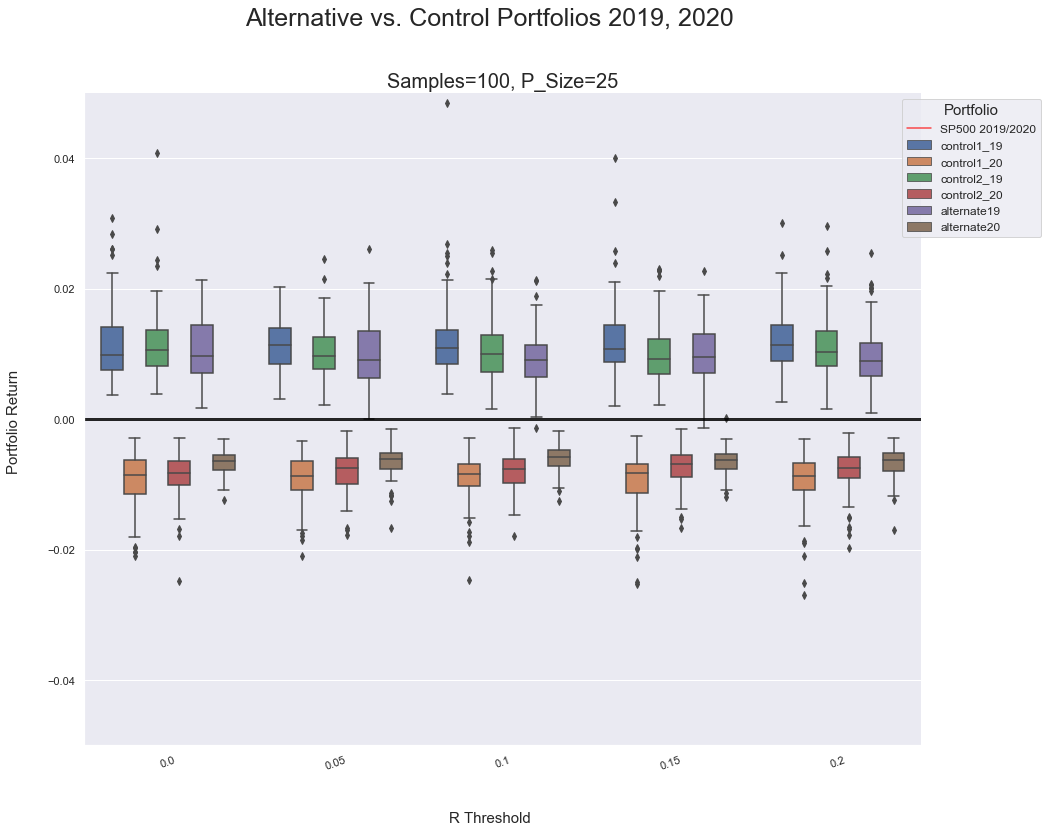

In [545]:
plot_boxplots_naive(sample_size=100, portfolio_size=25, dataframe=capm_comparison_df)

### RUN THE T-TEST ON 2019 RESULTS

### RUN THE T-TEST ON 2020 RESULTS